In [0]:
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

#from sklearn.ensemble import RandomForestClassifier, VotingClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
#from sklearn.feature_selection import SelectFromModel, SelectKBest
#from sklearn.pipeline import make_pipeline
#from sklearn.cross_validation import StratifiedKFold
#from sklearn.grid_search import GridSearchCV
#from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
#from sklearn.cross_validation import cross_val_score

#sns.set(style='white', context='notebook', palette='deep')
#pd.options.display.max_columns = 100

## Introduction

This is a data case of credit card costumer on January till March 2015. There was an information like :
- Customer Background
  * Age
  * Sex
  * Marriage Status
  * Education
- Bill Amount
- Pay Amount
- Pay Status

### Objective Models

Predict which costumer of credit card that have a risk to late for paying the bill in May based on the February till April data.

## Exploratory Data Analysis

In [0]:
training = pd.read_csv('training.csv')
train=training.drop(columns=['ID'])
testing = pd.read_csv('testing.csv', sep=';')
test=testing.drop(columns=['ID'])

In [289]:
train.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [290]:
train.shape

(16625, 15)

In [291]:
test.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


In [292]:
test.shape

(16625, 14)

In [293]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 15 columns):
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(7), int64(8)
memory usage: 1.9 MB


In [294]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 14 columns):
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
dtypes: float64(7), int64(7)
memory usage: 1.8 MB


### Feature Description

- ID           = Customer ID

- LIMIT_BAL    = Limit of Credit Balance

- MARRIAGE     = Marriage Status
  * 1 : Single (Belum Menikah)
  * 2 : Married (Menikah)
  * 3 : Others (Lainnya)
  
- EDUCATION    = Last Costumer Education
  * 1: S2/S3 (Master Degree)
  * 2: Dipl/S1 (Bachelor Degree)
  * 3: SMA (High School)
  * 4: Lainnya (Others)
  
- SEX (Jenis Kelamin)       
  * 1 : Pria
  * 2 : Wanita
  
- AGE (Umur)

- PAY_1 : Status Pembayaran Bulan Februari
- PAY_2 : Status Pembayaran Bulan Maret
- PAY_3 : Status Pembayaran Bulam April
  * 0 = Tepat Waktu
  * 1 = Terlambat 1 bulan
  * 2 = Terlambat 2 bulan
  * 3 = Terlambat 3 bulan
  
- BILL_AMT1 : Jumlah Tagihan Bulan Februari
- BILL_AMT2 : Jumlah Tagihan Bulan Maret
- BILL_AMT3 : Jumlah Tagihan Bulan April

- PAY_AMT1 : Jumlah Pembayaran Bulan Februari
- PAY_AMT2 : Jumlah Pembayaran Bulan Maret
- PAY_AMT3 : Jumlah Pembayaran Bulan April

- TARGET : Prediksi Status Pembayaran Bulan Mei
  * 1: Terlambat
  * 0: Tepat Waktu

## Target Distribution

TARGET feature is the target variable (label).

The training set contains 16625 observations of 15 features and 1 label.

All of our features are numerical in nature and all is fulfil.

In [295]:
pie=(train['TARGET'])
pieT= train.TARGET.value_counts().head(5)
pieT

0    9989
1    6636
Name: TARGET, dtype: int64

<function matplotlib.pyplot.show>

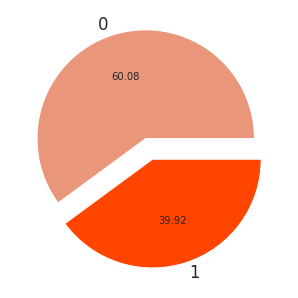

In [296]:
colors = ['darksalmon', 'orangered']
explode = (0.1 , 0.1)

plt.figure(figsize=(5,5))
plt.pie(pieT, labels=pieT.index, autopct='%.2f',colors=colors,explode=explode)
plt.show

Berdasarkan features target, dapat diketahui bahwa terdapat 
* 60,08% konsumen dengan prediksi status pembayaran terlambat
* 39,92% konsumen dengan prediksi status pembayaran tepat waktu

## Features Visualization

### Gender

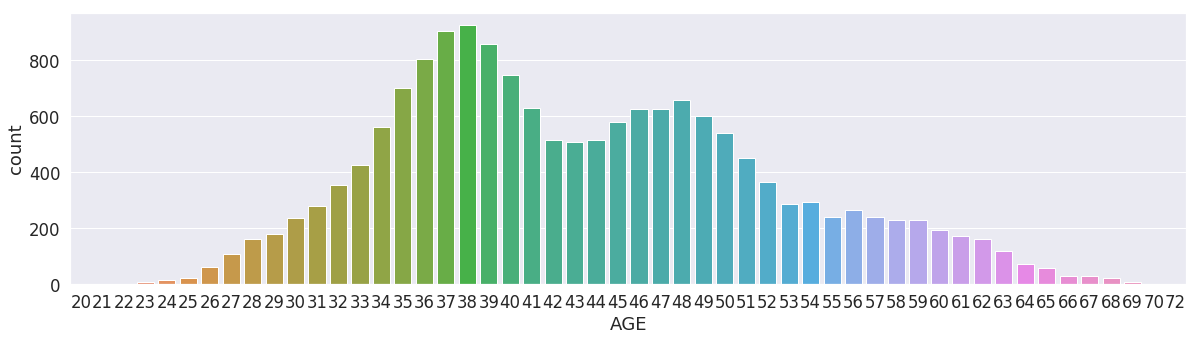

In [297]:
f=plt.figure(figsize=(20,5))
sns.countplot(train['AGE'])

Age of consumer is between 20 till 72 years old and age between 37 till 39 has a highest amount

### Marriage

In [298]:
pie=(train['MARRIAGE'])
pieM= train.MARRIAGE.value_counts()
pieM

1    8901
2    7519
3     205
Name: MARRIAGE, dtype: int64

<function matplotlib.pyplot.show>

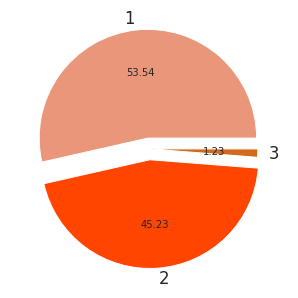

In [299]:
colors = ['darksalmon', 'orangered','chocolate']
explode = (0.1 , 0.1, 0)

plt.figure(figsize=(5,5))
plt.pie(pieM, labels=pieM.index, autopct='%.2f',colors=colors,explode=explode)
plt.show

Status konsumen berdasarkan status pernikahannya didapatkan data :
- Single (Belum Menikah) = 53.54%
- Married (Menikah) = 45.23%
- Others (Lainnya) = 1.23%

### Education

In [300]:
pie=(train['EDUCATION'])
pieE= train.EDUCATION.value_counts()
pieE

2    6925
3    5359
1    4029
4     312
Name: EDUCATION, dtype: int64

<function matplotlib.pyplot.show>

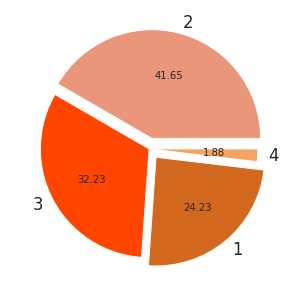

In [301]:
colors = ['darksalmon', 'orangered','chocolate', 'sandybrown']
explode = (0.1 , 0, 0.1, 0)

plt.figure(figsize=(5,5))
plt.pie(pieE, labels=pieE.index, autopct='%.2f',colors=colors,explode=explode)
plt.show

Data konsumen berdasarkan pendidikannya
- S2/S3 (Master Degree) = 24,23%
- Dipl/S1 (Bachelor Degree) = 41,65%
- SMA (High School) = 32,23%
- Lainnya (Others = 1,88 %

### Sex

In [302]:
pie=(train['SEX'])
pieS= train.SEX.value_counts()
pieS

2    9788
1    6837
Name: SEX, dtype: int64

<function matplotlib.pyplot.show>

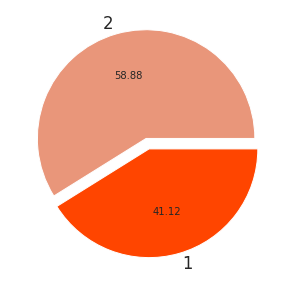

In [303]:
colors = ['darksalmon', 'orangered']
explode = (0.1 , 0)

plt.figure(figsize=(5,5))
plt.pie(pieS, labels=pieS.index, autopct='%.2f',colors=colors,explode=explode)
plt.show

Data Pelanggan berdasarkan jenis kelaminnya
- Pria = 41,12%
- Wanita = 58,88%

### Pay Status

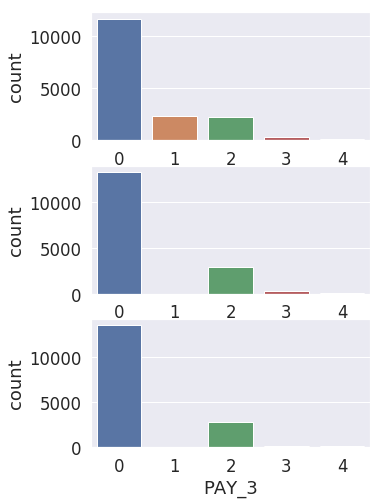

In [304]:
f=plt.figure(figsize=(5,8))
f.add_subplot(3,1,1)
sns.countplot(train['PAY_1'])
f.add_subplot(3,1,2)
sns.countplot(train['PAY_2'])
f.add_subplot(3,1,3)
sns.countplot(train['PAY_3'])


Berdasarkan Status Pembayarannya, didapatkan informasi sebagai berikut:
- Status Pembayaran Bulan Februari,
  * banyak konsumen membayar tepat waktu;
  * jumlah konsumen menurun pada bulan ke 1 dan ke 2;
  * sedikit yang membayar pada bulan ke 3;
  * sangat sedikit yang membayar pada bulan ke 4
- Status Pembayaran Bulan Maret,
  * banyak konsumen membayar tepat waktu;
  * menurun jumlahnya pada pembayaran bulan ke 2
  * lalu menurun jumlahnya lagi pada pembayaran bulan ke 3
  * sangat sedikit yang membayar pada bulan ke 1 dan 4
- Status Pembayaran Bulan April,
  * banyak konsumen membayar tepat waktu;
  * menurun jumlahnya pada pembayaran bulan ke 2
  * lalu menurun jumlahnya lagi pada pembayaran bulan ke 1, 3 dan 4

## Detecting Outliers

In [0]:
def detect_outliers(df,n,features):
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

# detect outliers from Age, SibSp , Parch and Fare
# These are the numerical features present in the dataset
Outliers_to_drop = detect_outliers(train,2,["LIMIT_BAL",
                                            "MARRIAGE",
                                            "EDUCATION",
                                            "SEX",
                                            "AGE",
                                            "PAY_1",
                                            "PAY_2",
                                            "PAY_3",
                                            "BILL_AMT1",
                                            "BILL_AMT2",
                                            "BILL_AMT3",
                                            "PAY_AMT1",
                                            "PAY_AMT2",
                                            "PAY_AMT3",
                                            "TARGET"])

In [221]:
train.loc[Outliers_to_drop]

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
717,760000.0,1,1,2,44,0,0,0,447670.0,455970.0,462497.0,20011.0,19500.0,19019.0,0
1125,700000.0,2,1,2,38,0,0,0,8277.0,18282.0,130130.0,17599.0,130370.0,3381.0,0
1678,510000.0,1,1,1,40,0,0,0,3196.0,16447.0,3317.0,16447.0,3317.0,10771.0,0
2195,510000.0,1,1,2,38,0,0,0,187070.0,181733.0,192903.0,8500.0,17000.0,0.0,0
2460,520000.0,1,3,2,40,1,2,2,133890.0,106928.0,37238.0,5022.0,0.0,20000.0,0
2623,640000.0,2,1,2,41,0,0,0,105423.0,133637.0,118372.0,51644.0,30291.0,41.0,0
2925,600000.0,1,1,2,43,0,0,0,22921.0,11441.0,23471.0,11444.0,23537.0,31171.0,0
3362,620000.0,2,3,2,37,0,0,0,31400.0,32166.0,17206.0,32335.0,17244.0,154826.0,0
4276,620000.0,2,2,1,36,0,0,0,5712.0,11598.0,21049.0,11881.0,21171.0,13915.0,0
4465,550000.0,2,3,2,37,0,0,0,27093.0,30805.0,7451.0,30820.0,7851.0,19751.0,0


By checking the outlier, there was 1914 outliers in the training set, which represents 11.5% of training data.

In [0]:
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

The outliers has been dropped

## Exploring Variables

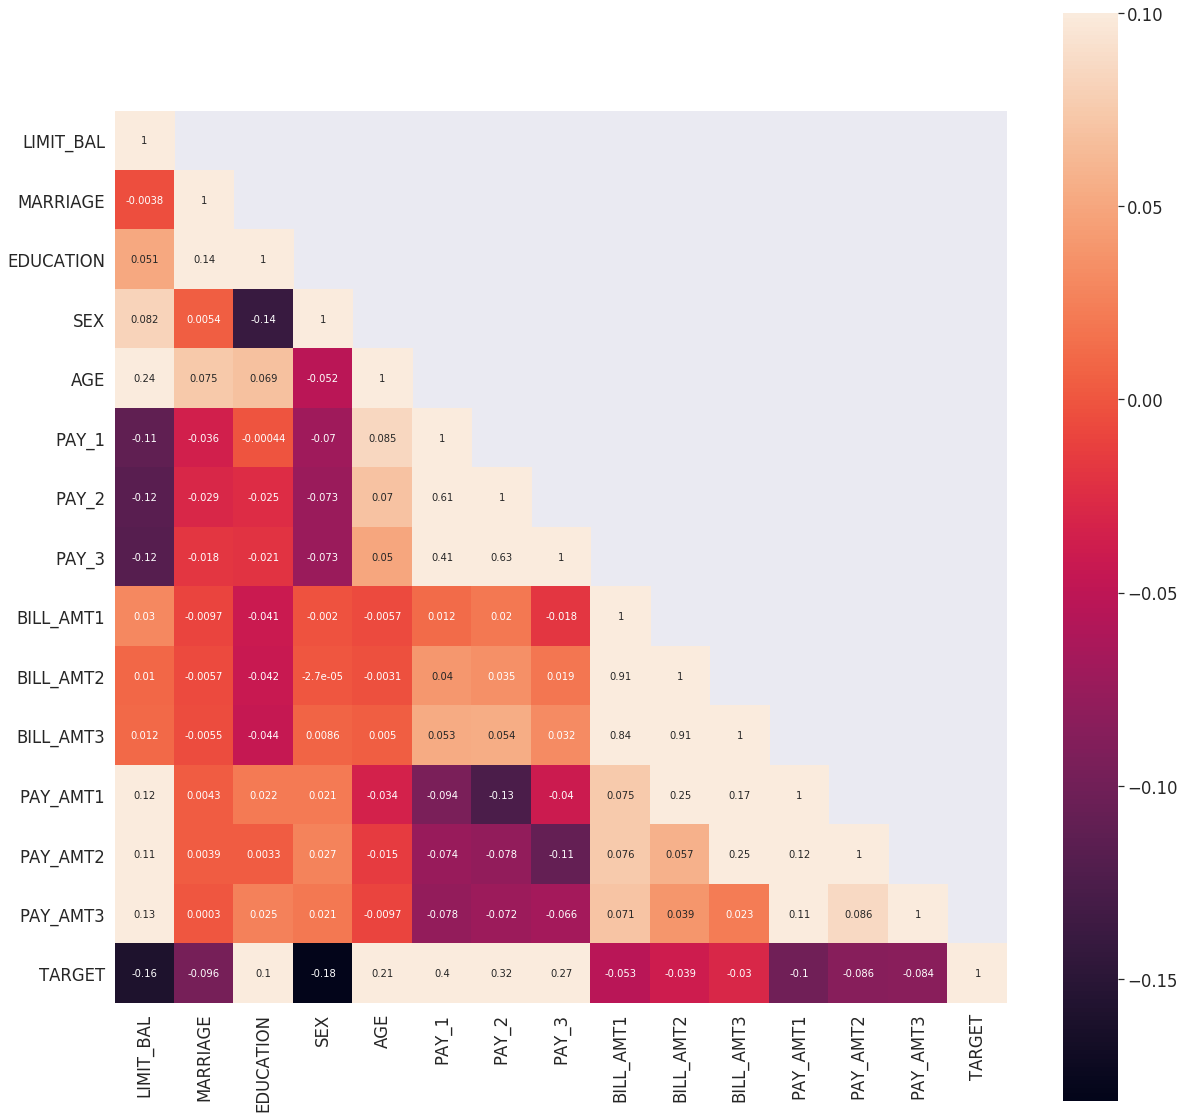

In [307]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
#create correlation with hitmap

#create correlation
corr = train.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (5,3))
fig.set_size_inches(20,20)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.1, 
            square = True, 
            annot = True)

We can see that the Target has the highest correlation with age, and payment status every month.

## Exploring Highest Correlation of Target

### Age

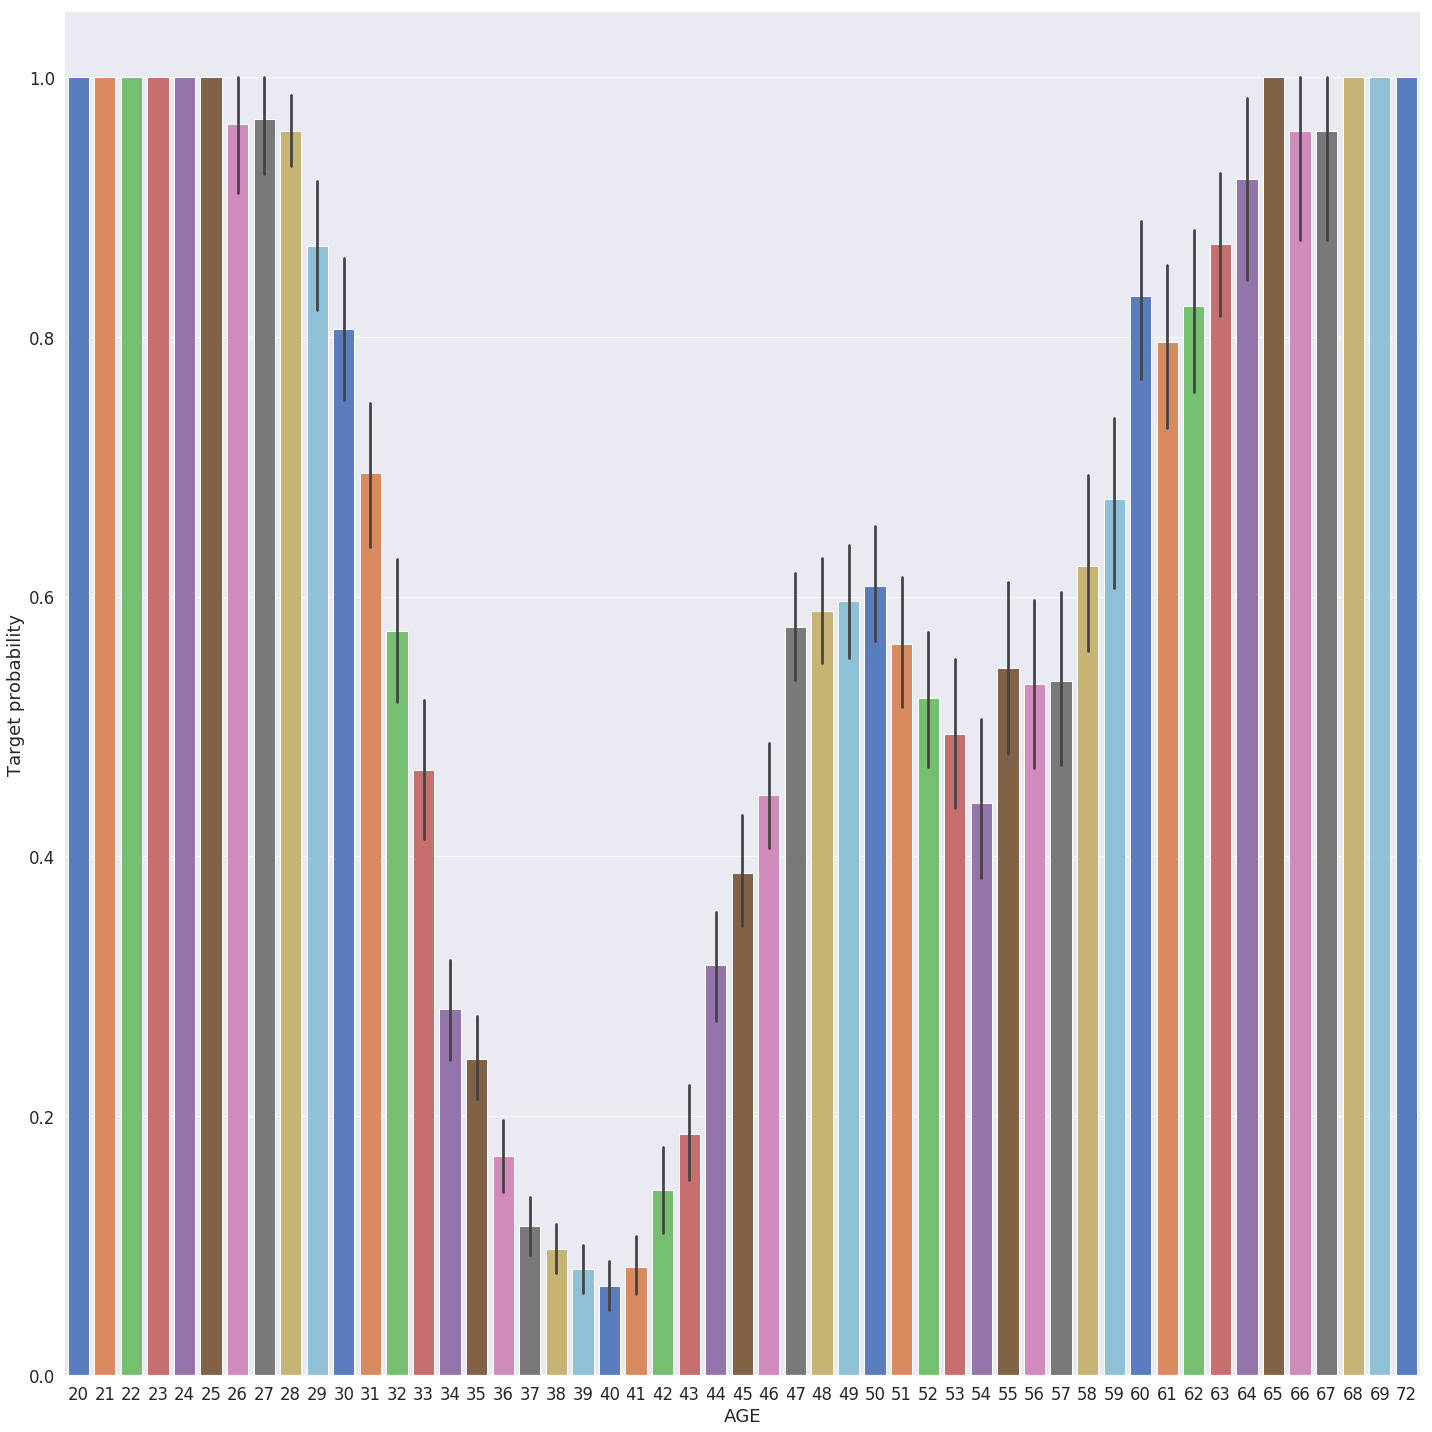

In [308]:
# Explore Age feature quantiles vs Target
g  = sns.factorplot(x="AGE",y="TARGET",data=train,kind="bar", size = 20 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

Berdasarkan gambar diatas, dapat diketahui bahwa ada beberapa umur yang memiliki probabilitas mendekati 1 yang artinya terlambat dalam pembayaran kartu kredit seperti pada umur 20-25, 65, 68, 69 dan 72 tahun. Sedangkan untuk umur yang membayar tagihan kartu kredit tepat waktu yaitu 34-45 tahun.

### Payment Status of February

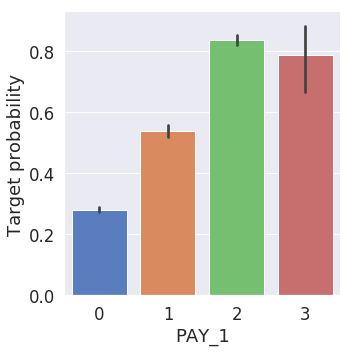

In [309]:
# Explore payment feature quantiles vs Target
g  = sns.factorplot(x="PAY_1",y="TARGET",data=train,kind="bar", size = 5 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

Berdasarkan status pembayaran pada bulan Februari, konsumen yang membayar tepat waktu dan terlambat pada bulan pertama, memiliki prediksi bahwa mereka juga akan melakukan pembayaran dengan tepat waktu pada bulan Mei mendatang. Sedangkan untuk yang membayar pada bulan ke-2 dan ke-3 akan diprediksi membayar terlambat pula untuk bulan Mei mendatang.

### Payment Status of March

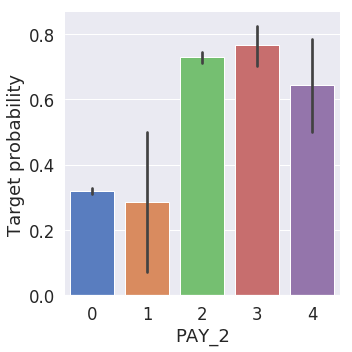

In [310]:
# Explore payment feature quantiles vs Target
g  = sns.factorplot(x="PAY_2",y="TARGET",data=train,kind="bar", size = 5 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

Berdasarkan status pembayaran pada bulan Maret, konsumen yang membayar tepat waktu dan terlambat pada bulan pertama, memiliki prediksi bahwa mereka juga akan melakukan pembayaran dengan tepat waktu pada bulan Mei mendatang. Sedangkan untuk yang membayar pada bulan ke-2, ke-3 dan ke-4 akan diprediksi membayar terlambat pula untuk bulan Mei mendatang.

### Payment Status of April

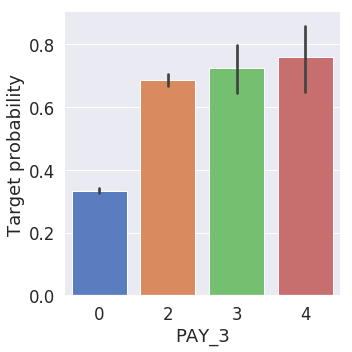

In [311]:
# Explore payment feature quantiles vs Target
g  = sns.factorplot(x="PAY_3",y="TARGET",data=train,kind="bar", size = 5 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

Berdasarkan status pembayaran pada bulan April, konsumen yang membayar tepat waktu, memiliki prediksi bahwa mereka juga akan melakukan pembayaran dengan tepat waktu pada bulan Mei mendatang. Sedangkan untuk yang membayar pada bulan ke-2, ke-3 dan ke-4 akan diprediksi membayar terlambat pula untuk bulan Mei mendatang.

## Merging Dataset

In [0]:
train_len = len(train)
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

In [313]:
dataset.shape

(31336, 15)

In [314]:
dataset.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,EDUCATION,LIMIT_BAL,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_AMT1,PAY_AMT2,PAY_AMT3,SEX,TARGET
0,40,24607.0,24430.0,23881.0,1,30000.0,1,0,0,0,1700.0,1600.0,1287.0,2,0.0
1,41,17040.0,16474.0,17203.0,1,20000.0,1,1,2,0,0.0,1300.0,1500.0,2,0.0
2,36,17332.0,18600.0,17947.0,1,20000.0,1,0,0,0,1580.0,1367.0,1178.0,2,0.0
3,35,2003.0,2948.0,3372.0,1,20000.0,1,0,0,0,1086.0,1000.0,0.0,2,0.0
4,40,16500.0,17012.0,18181.0,1,20000.0,1,0,0,0,1281.0,1450.0,1600.0,2,0.0


In [0]:
dataset = dataset.rename(columns={'AGE': 'Age',
                                  'BILL_AMT1': 'BillAmount1',
                                  'BILL_AMT2': 'BillAmount2',
                                  'BILL_AMT3': 'BillAmount3',
                                  'EDUCATION': 'Education',
                                  'LIMIT_BAL': 'LimitBalance',
                                  'MARRIAGE': 'Marriage',
                                  'PAY_1': 'Pay1',
                                  'PAY_2': 'Pay2',
                                  'PAY_3': 'Pay3',
                                  'PAY_AMT1': 'PayAmount1',
                                  'PAY_AMT2': 'PayAmount2',
                                  'PAY_AMT3': 'PayAmount3',
                                  'SEX': 'Sex',
                                  'TARGET': 'Target'})

train = train.rename(columns={'AGE': 'Age',
                                  'BILL_AMT1': 'BillAmount1',
                                  'BILL_AMT2': 'BillAmount2',
                                  'BILL_AMT3': 'BillAmount3',
                                  'EDUCATION': 'Education',
                                  'LIMIT_BAL': 'LimitBalance',
                                  'MARRIAGE': 'Marriage',
                                  'PAY_1': 'Pay1',
                                  'PAY_2': 'Pay2',
                                  'PAY_3': 'Pay3',
                                  'PAY_AMT1': 'PayAmount1',
                                  'PAY_AMT2': 'PayAmount2',
                                  'PAY_AMT3': 'PayAmount3',
                                  'SEX': 'Sex',
                                  'TARGET': 'Target'})

test = test.rename(columns={'AGE': 'Age',
                                  'BILL_AMT1': 'BillAmount1',
                                  'BILL_AMT2': 'BillAmount2',
                                  'BILL_AMT3': 'BillAmount3',
                                  'EDUCATION': 'Education',
                                  'LIMIT_BAL': 'LimitBalance',
                                  'MARRIAGE': 'Marriage',
                                  'PAY_1': 'Pay1',
                                  'PAY_2': 'Pay2',
                                  'PAY_3': 'Pay3',
                                  'PAY_AMT1': 'PayAmount1',
                                  'PAY_AMT2': 'PayAmount2',
                                  'PAY_AMT3': 'PayAmount3',
                                  'SEX': 'Sex'})

In [316]:
dataset.head()

,Age,BillAmount1,BillAmount2,BillAmount3,Education,LimitBalance,Marriage,Pay1,Pay2,Pay3,PayAmount1,PayAmount2,PayAmount3,Sex,Target
0,40,24607.0,24430.0,23881.0,1,30000.0,1,0,0,0,1700.0,1600.0,1287.0,2,0.0
1,41,17040.0,16474.0,17203.0,1,20000.0,1,1,2,0,0.0,1300.0,1500.0,2,0.0
2,36,17332.0,18600.0,17947.0,1,20000.0,1,0,0,0,1580.0,1367.0,1178.0,2,0.0
3,35,2003.0,2948.0,3372.0,1,20000.0,1,0,0,0,1086.0,1000.0,0.0,2,0.0
4,40,16500.0,17012.0,18181.0,1,20000.0,1,0,0,0,1281.0,1450.0,1600.0,2,0.0


## Building Dummies Variable

In [0]:
dataset = pd.get_dummies(dataset, columns = ["Age"], prefix="Age")
dataset = pd.get_dummies(dataset, columns = ["BillAmount1"], prefix="BillAmount1")
dataset = pd.get_dummies(dataset, columns = ["BillAmount2"], prefix="BillAmount2")
dataset = pd.get_dummies(dataset, columns = ["BillAmount3"], prefix="BillAmount3")
dataset = pd.get_dummies(dataset, columns = ["Education"], prefix="Education")
dataset = pd.get_dummies(dataset, columns = ["LimitBalance"], prefix="LimitBalance")
dataset = pd.get_dummies(dataset, columns = ["Marriage"], prefix="Marriage")
dataset = pd.get_dummies(dataset, columns = ["Pay1"], prefix="Pay1")
dataset = pd.get_dummies(dataset, columns = ["Pay2"], prefix="Pay2")
dataset = pd.get_dummies(dataset, columns = ["Pay3"], prefix="Pay3")
dataset = pd.get_dummies(dataset, columns = ["PayAmount1"], prefix="PayAmount1")
dataset = pd.get_dummies(dataset, columns = ["PayAmount2"], prefix="PayAmount2")
dataset = pd.get_dummies(dataset, columns = ["PayAmount3"], prefix="PayAmount3")
dataset = pd.get_dummies(dataset, columns = ["Sex"], prefix="Sex")

In [318]:
dataset.head()

,Target,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27,Age_28,Age_29,Age_30,Age_31,Age_32,Age_33,Age_34,Age_35,Age_36,Age_37,Age_38,Age_39,Age_40,Age_41,Age_42,Age_43,Age_44,Age_45,Age_46,Age_47,Age_48,Age_49,Age_50,Age_51,Age_52,Age_53,Age_54,Age_55,Age_56,Age_57,Age_58,...,PayAmount3_163597.0,PayAmount3_163881.0,PayAmount3_168342.0,PayAmount3_169267.0,PayAmount3_171716.0,PayAmount3_174749.0,PayAmount3_177202.0,PayAmount3_179768.0,PayAmount3_180000.0,PayAmount3_185957.0,PayAmount3_188840.0,PayAmount3_191260.0,PayAmount3_192994.0,PayAmount3_193712.0,PayAmount3_194043.0,PayAmount3_200128.0,PayAmount3_202000.0,PayAmount3_202129.0,PayAmount3_203000.0,PayAmount3_205000.0,PayAmount3_208821.0,PayAmount3_211250.0,PayAmount3_212059.0,PayAmount3_215917.0,PayAmount3_221876.0,PayAmount3_231064.0,PayAmount3_235075.0,PayAmount3_253009.0,PayAmount3_265852.0,PayAmount3_280695.0,PayAmount3_282562.0,PayAmount3_288921.0,PayAmount3_292462.0,PayAmount3_310852.0,PayAmount3_320008.0,PayAmount3_326974.0,PayAmount3_371718.0,PayAmount3_432130.0,Sex_1,Sex_2
0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Building Credit Score Modelling

In [0]:
train = data[:train_len]
test = dataset[train_len:]
test.drop(labels=["Target"],axis = 1,inplace=True)

In [0]:
## Separate train features and label 

train["Target"] = train["Target"].astype(int)

Y_train = train["Target"]

X_train = train.drop(labels = ["Target"],axis = 1)

In [0]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train, Y_train)

In [0]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

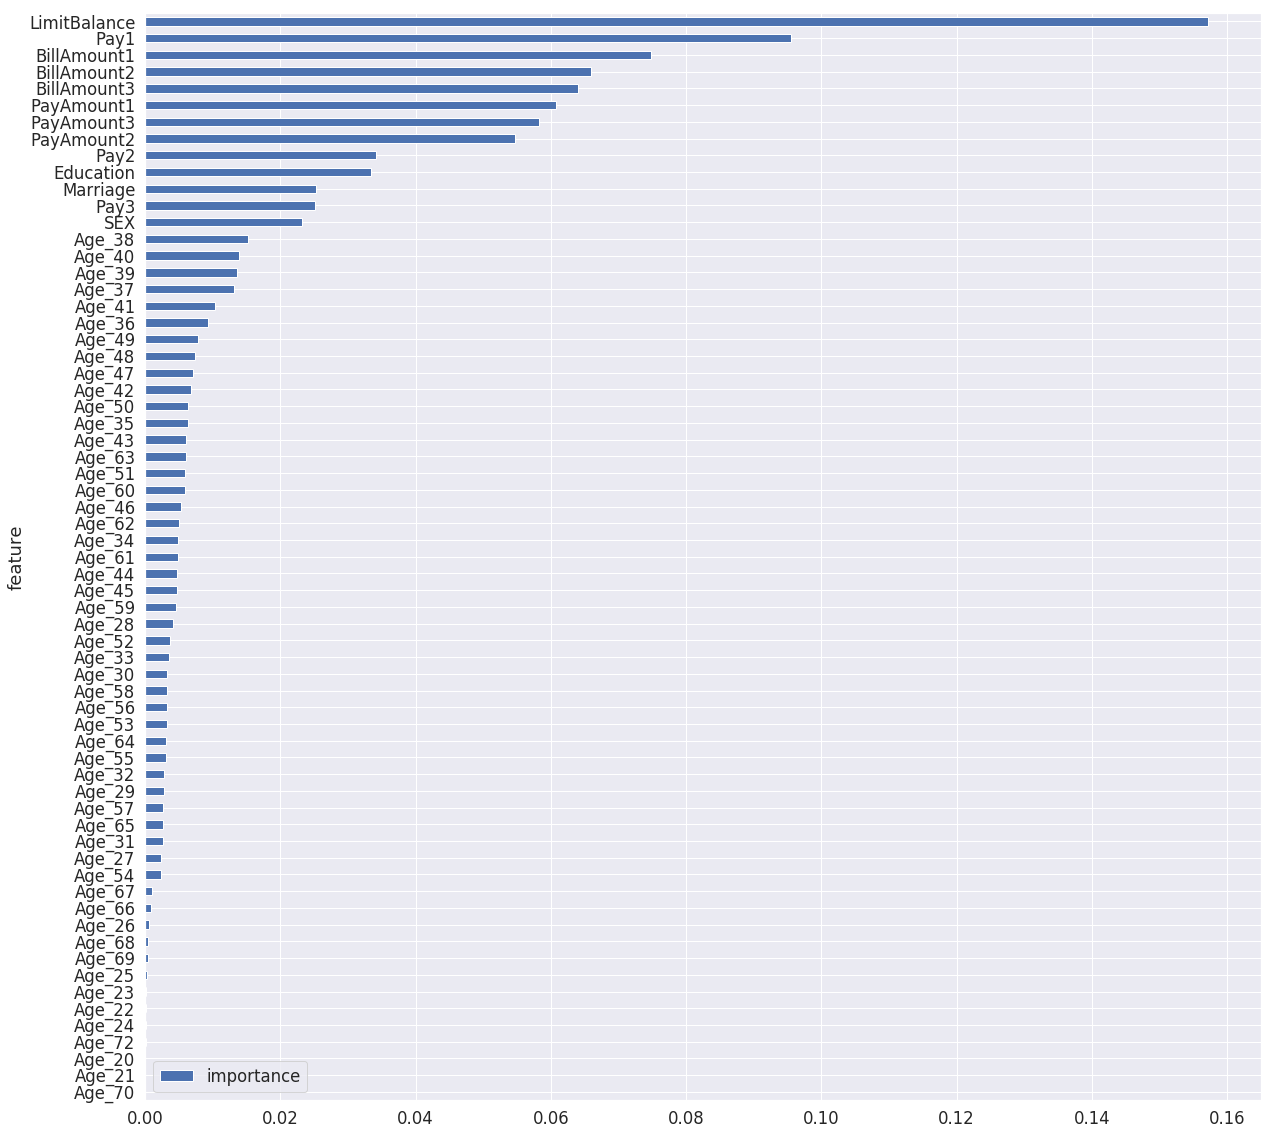

In [323]:
features.plot(kind='barh', figsize=(20, 20))

In [324]:
parameters = {'n_estimators': 1000, 'random_state' : 20}
    
model = RandomForestClassifier(**parameters)
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [325]:
model.predict

<bound method ForestClassifier.predict of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)>

In [326]:
test.head()

,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27,Age_28,Age_29,Age_30,Age_31,Age_32,Age_33,Age_34,Age_35,Age_36,Age_37,Age_38,Age_39,Age_40,Age_41,Age_42,Age_43,Age_44,Age_45,Age_46,Age_47,Age_48,Age_49,Age_50,Age_51,Age_52,Age_53,Age_54,Age_55,Age_56,Age_57,Age_58,Age_59,...,PayAmount3_163597.0,PayAmount3_163881.0,PayAmount3_168342.0,PayAmount3_169267.0,PayAmount3_171716.0,PayAmount3_174749.0,PayAmount3_177202.0,PayAmount3_179768.0,PayAmount3_180000.0,PayAmount3_185957.0,PayAmount3_188840.0,PayAmount3_191260.0,PayAmount3_192994.0,PayAmount3_193712.0,PayAmount3_194043.0,PayAmount3_200128.0,PayAmount3_202000.0,PayAmount3_202129.0,PayAmount3_203000.0,PayAmount3_205000.0,PayAmount3_208821.0,PayAmount3_211250.0,PayAmount3_212059.0,PayAmount3_215917.0,PayAmount3_221876.0,PayAmount3_231064.0,PayAmount3_235075.0,PayAmount3_253009.0,PayAmount3_265852.0,PayAmount3_280695.0,PayAmount3_282562.0,PayAmount3_288921.0,PayAmount3_292462.0,PayAmount3_310852.0,PayAmount3_320008.0,PayAmount3_326974.0,PayAmount3_371718.0,PayAmount3_432130.0,Sex_1,Sex_2
14711,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
14712,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
14713,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
14714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
14715,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Model Accuracy

In [327]:
model.score(X_train, Y_train)

0.9995921419346068

## Decision Tree Visualization

In [0]:
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                #feature_names = X_train.feature_names,
                #class_names = Y_train.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

## Predict Credit Scoring

In [330]:
results_df = pd.read_csv("testing.csv", sep=';')
results_df.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


In [0]:
results = results_df.rename(columns={'AGE': 'Age',
                                  'BILL_AMT1': 'BillAmount1',
                                  'BILL_AMT2': 'BillAmount2',
                                  'BILL_AMT3': 'BillAmount3',
                                  'EDUCATION': 'Education',
                                  'LIMIT_BAL': 'LimitBalance',
                                  'MARRIAGE': 'Marriage',
                                  'PAY_1': 'Pay1',
                                  'PAY_2': 'Pay2',
                                  'PAY_3': 'Pay3',
                                  'PAY_AMT1': 'PayAmount1',
                                  'PAY_AMT2': 'PayAmount2',
                                  'PAY_AMT3': 'PayAmount3',
                                  'SEX': 'Sex'})

In [333]:
results.head()

,ID,LimitBalance,Marriage,Education,Sex,Age,Pay1,Pay2,Pay3,BillAmount1,BillAmount2,BillAmount3,PayAmount1,PayAmount2,PayAmount3
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


In [0]:
results = pd.get_dummies(results, columns = ["Age"], prefix="Age")
results = pd.get_dummies(results, columns = ["BillAmount1"], prefix="BillAmount1")
results = pd.get_dummies(results, columns = ["BillAmount2"], prefix="BillAmount2")
results = pd.get_dummies(results, columns = ["BillAmount3"], prefix="BillAmount3")
results = pd.get_dummies(results, columns = ["Education"], prefix="Education")
results = pd.get_dummies(results, columns = ["LimitBalance"], prefix="LimitBalance")
results = pd.get_dummies(results, columns = ["Marriage"], prefix="Marriage")
results = pd.get_dummies(results, columns = ["Pay1"], prefix="Pay1")
results = pd.get_dummies(results, columns = ["Pay2"], prefix="Pay2")
results = pd.get_dummies(results, columns = ["Pay3"], prefix="Pay3")
results = pd.get_dummies(results, columns = ["PayAmount1"], prefix="PayAmount1")
results = pd.get_dummies(results, columns = ["PayAmount2"], prefix="PayAmount2")
results = pd.get_dummies(results, columns = ["PayAmount3"], prefix="PayAmount3")
results = pd.get_dummies(results, columns = ["Sex"], prefix="Sex")

In [335]:
results.head()

,ID,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27,Age_28,Age_29,Age_30,Age_31,Age_32,Age_33,Age_34,Age_35,Age_36,Age_37,Age_38,Age_39,Age_40,Age_41,Age_42,Age_43,Age_44,Age_45,Age_46,Age_47,Age_48,Age_49,Age_50,Age_51,Age_52,Age_53,Age_54,Age_55,Age_56,Age_57,Age_58,...,PayAmount3_128000.0,PayAmount3_132116.0,PayAmount3_135000.0,PayAmount3_138355.0,PayAmount3_140000.0,PayAmount3_140061.0,PayAmount3_143701.0,PayAmount3_146900.0,PayAmount3_148192.0,PayAmount3_150000.0,PayAmount3_159658.0,PayAmount3_160897.0,PayAmount3_161084.0,PayAmount3_162856.0,PayAmount3_163881.0,PayAmount3_168342.0,PayAmount3_171716.0,PayAmount3_177202.0,PayAmount3_179768.0,PayAmount3_180000.0,PayAmount3_185957.0,PayAmount3_188840.0,PayAmount3_192994.0,PayAmount3_193712.0,PayAmount3_200128.0,PayAmount3_202000.0,PayAmount3_205000.0,PayAmount3_208821.0,PayAmount3_211250.0,PayAmount3_212059.0,PayAmount3_231064.0,PayAmount3_235075.0,PayAmount3_253009.0,PayAmount3_265852.0,PayAmount3_280695.0,PayAmount3_292462.0,PayAmount3_320008.0,PayAmount3_432130.0,Sex_1,Sex_2
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
DefaultProba = model.predict_proba(results)
DefaultProba.predict
#DefaultProba = DefaultProba[:,1]
#results_df.SeriousDlqin2yrs = DefaultProba

#results_df = results_df.rename(columns={'Unnamed: 0': 'Id',
#                                        'SeriousDlqin2yrs': 'Probability'})

In [0]:
results_df = results_df.drop(["RevolvingUtilizationOfUnsecuredLines",
                             "age",
                             "NumberOfTime30-59DaysPastDueNotWorse",
                             "DebtRatio",
                             "MonthlyIncome",
                             "NumberOfOpenCreditLinesAndLoans",
                             "NumberOfTimes90DaysLate",
                             "NumberRealEstateLoansOrLines",
                             "NumberOfTime60-89DaysPastDueNotWorse",
                             "NumberOfDependents"], axis=1)

In [0]:
results_df.head()

In [0]:
results_df.to_csv("KAGGLE_CREDIT_SCORE.csv", index=False)